In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("titanic_toy.csv")

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
 X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
X_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

In [8]:
X_train

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6
...,...,...,...
106,21.0,7.6500,0
270,NaN,31.0000,0
860,41.0,NaN,2
435,14.0,120.0000,3


In [9]:
X_train["Age_mean"] = X_train["Age"].fillna(X_train["Age"].mean())
X_train["Age_median"] = X_train["Age"].fillna(X_train["Age"].median())

/home/deependra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/deependra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
X_train["Fare_mean"] = X_train["Fare"].fillna(X_train["Fare"].mean())
X_train["Fare_median"] = X_train["Fare"].fillna(X_train["Fare"].median())

/home/deependra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/deependra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
X_train

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
331,45.5,28.5000,0,45.500000,45.5,28.500000,28.5000
733,23.0,13.0000,0,23.000000,23.0,13.000000,13.0000
382,32.0,7.9250,0,32.000000,32.0,7.925000,7.9250
704,26.0,7.8542,1,26.000000,26.0,7.854200,7.8542
813,6.0,31.2750,6,6.000000,6.0,31.275000,31.2750
...,...,...,...,...,...,...,...
106,21.0,7.6500,0,21.000000,21.0,7.650000,7.6500
270,NaN,31.0000,0,29.498846,28.0,31.000000,31.0000
860,41.0,NaN,2,41.000000,41.0,32.517788,14.4000
435,14.0,120.0000,3,14.000000,14.0,120.000000,120.0000


In [12]:
print("The variance original value -",X_train["Age"].var())
print("The variance after imputing the mean of Age -",X_train["Age_mean"].var())
print("The variance after imputing the median of Age -",X_train["Age_median"].var())

print("The variance original value -",X_train["Fare"].var())
print("The variance after imputing the mean of Fare -",X_train["Fare_mean"].var())
print("The variance after imputing the median of Fare -",X_train["Fare_median"].var())

The variance original value - 210.2517072477435
The variance after imputing the mean of Age - 168.85193366872227
The variance after imputing the median of Age - 169.20731007048155
The variance original value - 2761.0314349486343
The variance after imputing the mean of Fare - 2621.232374951235
The variance after imputing the median of Fare - 2637.012481677765


In [13]:
import seaborn as sns

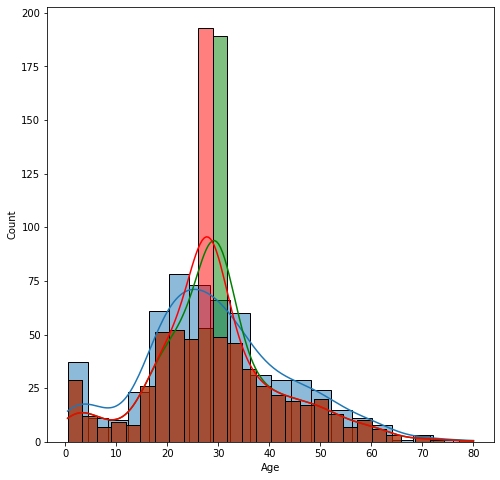

In [14]:
plt.figure(figsize=(8,8))

sns.histplot(X_train["Age"], kde = True)
sns.histplot(X_train["Age_mean"], color = "green", kde = True)
sns.histplot(X_train["Age_median"], color = "red", kde = True)
plt.show()

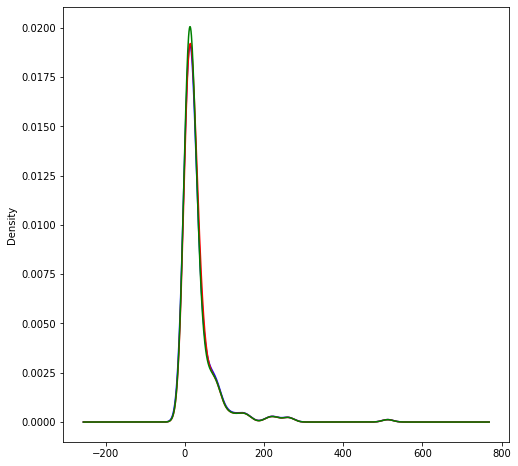

In [15]:
plt.figure(figsize=(8,8))

X_train["Fare"].plot(kind = "kde", color = "blue")
X_train["Fare_mean"].plot(kind = "kde", color = "red")
X_train["Fare_median"].plot(kind = "kde", color = "green")
plt.show()

In [16]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [17]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
Fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
Fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


<AxesSubplot:>

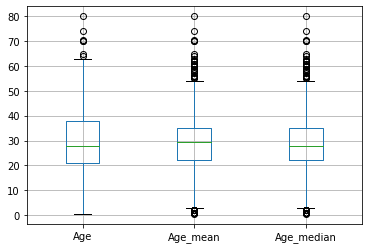

In [18]:
X_train[["Age","Age_mean","Age_median"]].boxplot()

<AxesSubplot:>

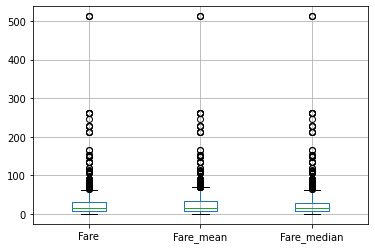

In [19]:
X_train[["Fare","Fare_mean","Fare_median"]].boxplot()

In [26]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
imputer1 = SimpleImputer(strategy="mean")
imputer2 = SimpleImputer(strategy="median")

In [21]:
trf = ColumnTransformer([("imputer1",imputer1,["Age"]),("imputer2",imputer2,["Fare"])], remainder="passthrough")

In [27]:
trf.fit(X_train1)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [23]:
trf.named_transformers_["imputer1"].statistics_[0]


29.498846153846156

In [24]:
trf.named_transformers_["imputer2"].statistics_[0]

14.4

In [29]:
X_train1 = trf.transform(X_train1)
X_test1 = trf.transform(X_test1)